In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

col_names = []
for i in range(9):
    names = list(range(121))
    for j, n in enumerate(names):
        names[j] = str(i) + '_' + str(n)
    col_names.extend(names)
other_names = ['me_scary', 'friend_scary', 'enemy1_scary', 'enemy2_scary', 'food_inside', 'my_rel_x',
               'my_rel_y', 'friend_rel_x', 'friend_rel_y', 'stop', 'north', 'east', 'south', 'west']
col_names.extend(other_names)

# read the data

In [2]:
df_data = pd.read_csv('my_data_collect.csv')

In [3]:
df_data.shape

(10707, 1103)

In [4]:
#df_data = pd.read_csv('my_data_collect.csv', names = col_names, header = None)
#df_data = df_data[0:0]
#df_data.to_csv('my_data_collect.csv', index = False)

In [5]:
df_data.head()

,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,...,food_inside,my_rel_x,my_rel_y,friend_rel_x,friend_rel_y,stop,north,east,south,west
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [6]:
#df_data.fillna(0, inplace = True)

In [7]:
#df_data.isnull().sum().sum()

In [8]:
#df_data = df_data.astype({'friend_scary':'int32'})

In [9]:
#df_data['friend_scary']

# extract features and labels

In [10]:
features = df_data[df_data.columns[:-5]].to_numpy()

In [11]:
labels = df_data[df_data.columns[-5:]].to_numpy()

In [12]:
features.shape

(10707, 1098)

In [13]:
labels.shape

(10707, 5)

# functions

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [16]:
def softmax(A):
    exp_A = np.exp(A)
    return exp_A / exp_A.sum(axis = 1, keepdims = True)

# generate weights

In [17]:
cases_number = features.shape[0]
features_number = features.shape[1]

In [18]:
neurons = 700
outputs = 5

In [19]:
features_z_norm = []
for row in features:
    m = np.mean(row)
    sd = np.sqrt(np.sum((row - m) ** 2) / (features_number - 1))
    features_z_norm.append((row - m) / sd)
features_z_norm = np.asarray(features_z_norm)

In [20]:
wh = np.random.rand(features_number, neurons)
bh = np.random.randn(neurons)

In [21]:
wo = np.random.rand(neurons, outputs)
bo = np.random.randn(outputs)

In [75]:
learning_rate = 1e-6

In [117]:
error_cost = []

In [118]:
counter = 0
for epoch in range(5000):
    # feed forward
    sh = np.dot(features, wh) + bh
    ah = sigmoid(sh)
    so = np.dot(ah, wo) + bo
    ao = softmax(so)
    
    # back propagation
    der_cost_so = ao - labels
    der_cost_bo = der_cost_so
    der_so_wo = ah
    der_cost_wo = np.dot(der_so_wo.T, der_cost_so)
    
    der_so_ah = wo
    der_cost_ah = np.dot(der_cost_so, der_so_ah.T)
    der_ah_sh = sigmoid_der(sh)
    der_sh_wh = features
    der_cost_wh = np.dot(der_sh_wh.T, der_ah_sh * der_cost_ah)
    der_cost_bh = der_cost_ah * der_ah_sh
    
    # update weights
    wh -= learning_rate * der_cost_wh
    bh -= learning_rate * der_cost_bh.sum(axis = 0)
    wo -= learning_rate * der_cost_wo
    bo -= learning_rate * der_cost_bo.sum(axis = 0)
    
    if epoch % 200 == 0:
        loss = np.sum(-labels * np.log(ao))
        error_cost.append(loss)
        print(counter)
        counter += 200

0


/home/dim314159/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/dim314159/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800


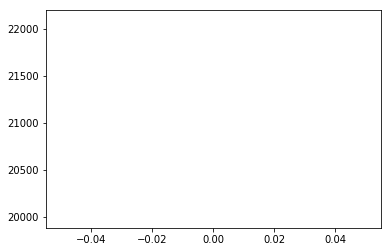

In [119]:
plt.plot(error_cost)
plt.show()

In [120]:
error_cost

[21041.937313122296,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [45]:
np.save('wh.npy', wh)
np.save('bh.npy', bh)
np.save('wo.npy', wo)
np.save('bo.npy', bo)

# Practice

In [58]:
wh = np.random.randn(features_number, neurons) * np.sqrt(2.0 / features_number)
bh = np.random.randn(neurons)

In [59]:
wo = np.random.randn(neurons, outputs) * np.sqrt(2.0 / neurons)
bo = np.random.randn(outputs)

In [68]:
learning_rate = 1e-6

In [61]:
error_cost = []

In [74]:
# feed forward
sh = np.dot(features, wh) + bh
ah = sigmoid(sh)
so = np.dot(ah, wo) + bo
ao = softmax(so)

# back propagation
der_cost_so = ao - labels
der_cost_bo = der_cost_so
der_so_wo = ah
der_cost_wo = np.dot(der_so_wo.T, der_cost_so)

der_so_ah = wo
der_cost_ah = np.dot(der_cost_so, der_so_ah.T)
der_ah_sh = sigmoid_der(sh)
der_sh_wh = features
der_cost_wh = np.dot(der_sh_wh.T, der_ah_sh * der_cost_ah)
der_cost_bh = der_cost_ah * der_ah_sh

# update weights
wh -= learning_rate * der_cost_wh
bh -= learning_rate * der_cost_bh.sum(axis = 0)
wo -= learning_rate * der_cost_wo
bo -= learning_rate * der_cost_bo.sum(axis = 0)

loss = np.sum(-labels * np.log(ao))
print(loss)

7862.035016563502


In [138]:
loss

nan

In [31]:
my_loss = labels * np.log(ao)

In [39]:
-np.sum(my_loss[:20])

95.28821430988025

In [40]:
len(my_loss)

5709

In [7]:
names = [1, 3, 5]
for i, n in enumerate(names):
    names[i] = str(i) + '_' + str(n)
names

['0_1', '1_3', '2_5']

In [20]:
x = (1, 3)
y = (1.0, 3.0)
if x == y:
    print('hi')

hi
